# Upload Dataset

In [2]:
from SCRIPTS.A_data_collection import make_dataset_for_regression
#The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
X, y = make_dataset_for_regression(n_samples=1000, n_features=10, n_informative=3, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


## Data analysis
Try to understand duplicates, range of values, functional dependencies

In [5]:
import pandas as pd

df = pd.DataFrame(X)
print(df.head())

          0         1         2         3         4         5         6  \
0 -1.687523  1.162717 -0.533602 -0.628703 -0.829337  0.042886  0.344324   
1 -1.020632 -0.220116 -0.869748  1.966181  0.835520 -0.296532  0.869868   
2 -0.510782 -0.234955  1.076270  0.670360  0.188123  1.359878  0.442312   
3 -0.904833  0.957409  1.689667 -0.700398  0.095618 -0.184501 -0.800839   
4 -0.230787 -0.355325 -1.067421  1.033823 -0.723273 -0.416435 -1.032871   

          7         8         9  
0  0.724020 -1.314765 -0.475478  
1  0.196561  0.281992 -0.401782  
2  0.190787  1.110523  0.219885  
3 -0.714054  0.557694 -1.467285  
4  0.578732 -0.200667 -0.426281  


In [6]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

### Single column analysis

In [7]:
distinct_values=df[0].nunique()
print(distinct_values)

1000


In [8]:
mean_values = df.mean()
std_values = df.std()

print("Mean values:")
print(mean_values)

print("Standard deviation values:")
print(std_values)


Mean values:
0    0.005780
1   -0.031556
2   -0.016019
3    0.036449
4   -0.023135
5   -0.001820
6   -0.026303
7    0.007726
8    0.018629
9    0.092134
dtype: float64
Standard deviation values:
0    0.991113
1    0.975035
2    0.982018
3    1.023308
4    0.966829
5    1.022371
6    0.987888
7    0.972030
8    1.026852
9    1.001554
dtype: float64


Create a function that changes at random the feature type with boolean or numeric values

In [9]:
import random

# List of names
names = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack']

# List of surnames
surnames = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor']

# Randomly select 10 elements from the names list
random_names = random.sample(names, 10)

# Randomly select 10 elements from the surnames list
random_surnames = random.sample(surnames, 10)

print(random_names)
print(random_surnames)

['Eve', 'Ivy', 'Frank', 'Jack', 'Alice', 'Henry', 'Charlie', 'David', 'Bob', 'Grace']
['Brown', 'Smith', 'Moore', 'Davis', 'Williams', 'Miller', 'Taylor', 'Johnson', 'Jones', 'Wilson']


In [10]:
import pandas as pd
import numpy as np

def inject_variable_type_issue(dataset, percentage):
    # Copy the dataset to avoid modifying the original
    polluted_dataset = dataset.copy()

    # Determine the number of features to be affected
    num_features_affected = int(len(dataset.columns) * percentage)

    # Generate random indices to select features to be affected
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)

    for idx in random_indices:
        column_name = dataset.columns[idx]
        #if data_type == 'numeric':
        if np.issubdtype(dataset[column_name].dtype, np.number):
            # Convert numeric feature to categorical or boolean
            prob= np.random.rand()
            if prob < 0.25:
                polluted_dataset[column_name] = np.random.choice(['red', 'green', 'blue'], size=len(dataset))
            elif prob < 0.5:
                polluted_dataset[column_name] = np.random.choice([True, False], size=len(dataset))
            elif prob<0.75:
                polluted_dataset[column_name] = np.random.choice(random_names, size=len(dataset))
            else:
                polluted_dataset[column_name] = np.random.choice(random_surnames, size=len(dataset))

    return polluted_dataset

polluted_dataset = inject_variable_type_issue(df, 0.5)
print(polluted_dataset.head())

          0         1      2         3         4      5         6      7  \
0 -1.687523  1.162717    red -0.628703 -0.829337   Jack    Wilson   True   
1 -1.020632 -0.220116   blue  1.966181  0.835520  Grace   Johnson   True   
2 -0.510782 -0.234955  green  0.670360  0.188123    Bob    Taylor  False   
3 -0.904833  0.957409  green -0.700398  0.095618    Eve  Williams  False   
4 -0.230787 -0.355325   blue  1.033823 -0.723273  David    Miller  False   

         8         9  
0  Johnson -0.475478  
1   Miller -0.401782  
2   Miller  0.219885  
3   Wilson -1.467285  
4   Taylor -0.426281  


## Statistics of the polluted dataset

In [42]:
for idx in range(len(polluted_dataset.columns)):
    print(polluted_dataset[idx].value_counts())
    distinct_values = (polluted_dataset[idx].nunique())
    print(distinct_values)
    if distinct_values < 15:
        print(polluted_dataset[idx].value_counts())
    else:
        print("Too many distinct values to print")
    uniqueness = distinct_values / len(polluted_dataset)
    print("Uniqueness: ", uniqueness)
    print ('min:', polluted_dataset[idx].min())
    print ('max:', polluted_dataset[idx].max())
    print ('mode:', polluted_dataset[idx].mode()[0])

0
-1.687523    1
-0.785703    1
 0.090695    1
 0.937122    1
-0.424756    1
            ..
 1.833320    1
-0.040272    1
 0.037820    1
-1.243515    1
 0.545855    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.2082926855229754
max: 3.279456552430336
mode: -3.2082926855229754
1
 1.162717    1
-2.800894    1
 0.683642    1
-0.797515    1
 0.175395    1
            ..
 0.987638    1
-2.073400    1
 0.766043    1
 0.861198    1
 0.180831    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.702650734489273
max: 3.4570878539816565
mode: -3.702650734489273
2
-0.533602    1
-0.538819    1
 1.058653    1
-0.739618    1
-0.368290    1
            ..
 0.305582    1
 0.650682    1
-0.483982    1
-0.375815    1
-0.832630    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -2.7560789184319727
max: 3.412176776324521
mode: -2.7560789

In [11]:
#import libraries and set up
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

2
blue     346
red      341
green    313
Name: count, dtype: int64


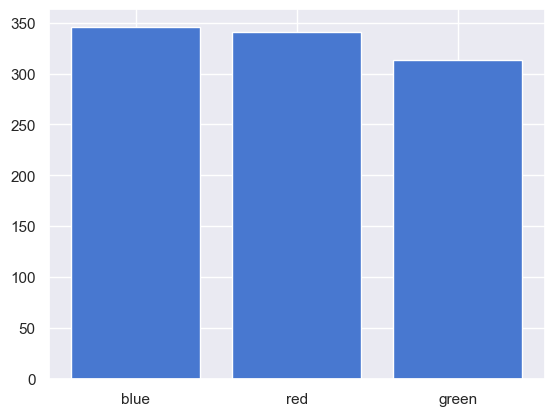

5
Grace      114
David      109
Henry      108
Frank      106
Jack       104
Charlie     97
Ivy         95
Eve         90
Alice       90
Bob         87
Name: count, dtype: int64


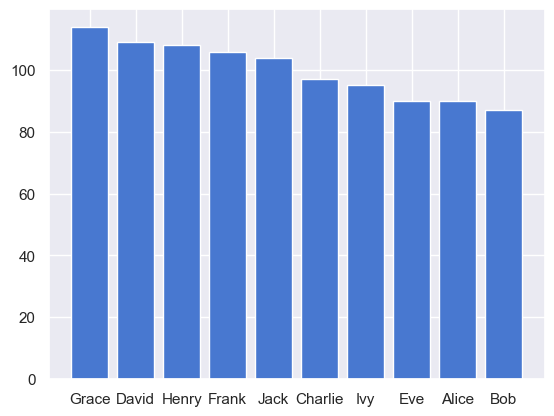

6
Miller      114
Brown       111
Smith       108
Taylor      107
Williams    107
Moore        97
Johnson      93
Jones        92
Wilson       87
Davis        84
Name: count, dtype: int64


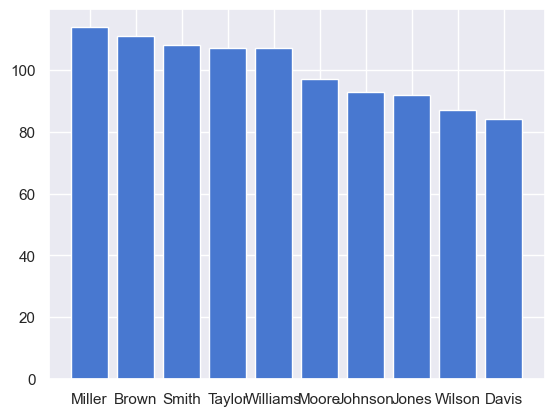

7
False    503
True     497
Name: count, dtype: int64


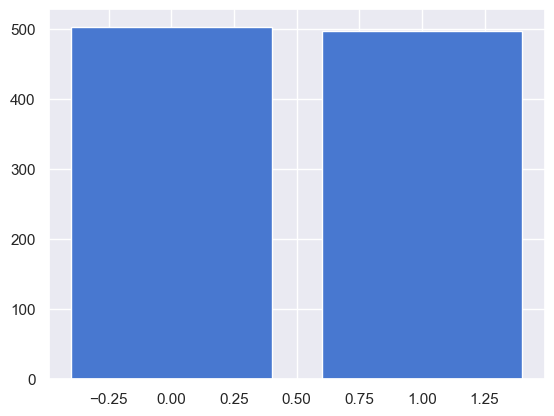

8
Miller      117
Taylor      114
Wilson      108
Jones       108
Brown       101
Smith        95
Johnson      94
Moore        94
Williams     85
Davis        84
Name: count, dtype: int64


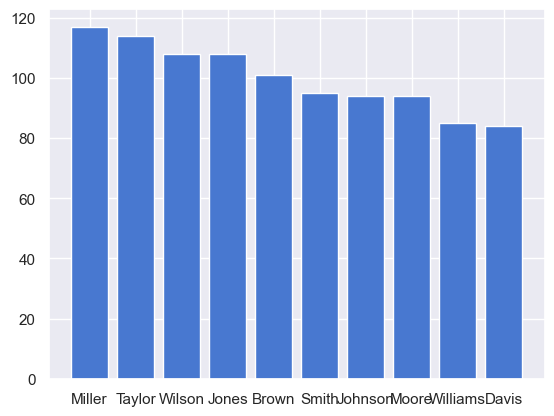

In [32]:
import matplotlib.pyplot as plt

# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if not np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        # Get the counts of each unique value in the column
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a bar plot of the counts
        plt.bar(value_counts.index, value_counts.values)

        # Show the plot
        plt.show()


0
-1.687523    1
-0.785703    1
 0.090695    1
 0.937122    1
-0.424756    1
            ..
 1.833320    1
-0.040272    1
 0.037820    1
-1.243515    1
 0.545855    1
Name: count, Length: 1000, dtype: int64
1
 1.162717    1
-2.800894    1
 0.683642    1
-0.797515    1
 0.175395    1
            ..
 0.987638    1
-2.073400    1
 0.766043    1
 0.861198    1
 0.180831    1
Name: count, Length: 1000, dtype: int64
3
-0.628703    1
 0.072923    1
-0.674491    1
-0.142296    1
-0.020361    1
            ..
 1.068018    1
-0.825995    1
-0.291956    1
-1.576035    1
 0.264601    1
Name: count, Length: 1000, dtype: int64
4
-0.829337    1
-1.152350    1
 0.602729    1
 1.543549    1
 0.370542    1
            ..
 0.306497    1
-0.376598    1
 0.744997    1
 0.346018    1
-2.117657    1
Name: count, Length: 1000, dtype: int64
9
-0.475478    1
-0.350641    1
 0.265358    1
 0.375385    1
 0.046493    1
            ..
 0.283911    1
 1.295265    1
-1.106879    1
 0.070702    1
 1.205578    1
Name:

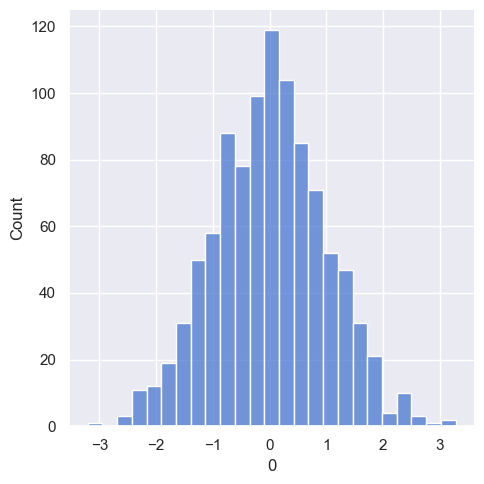

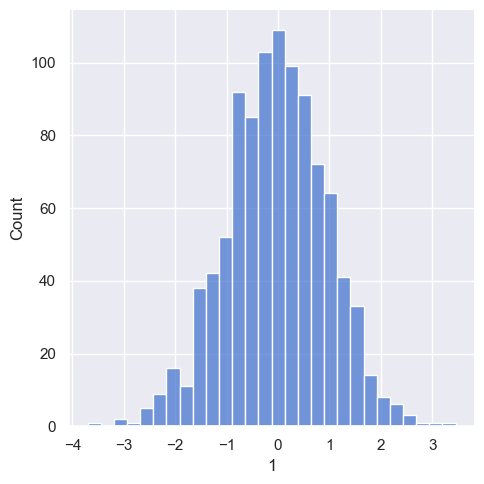

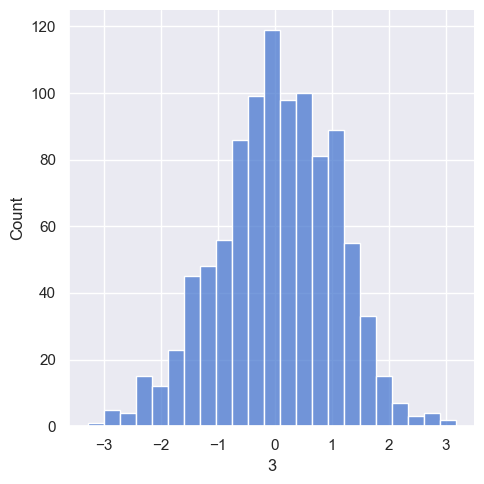

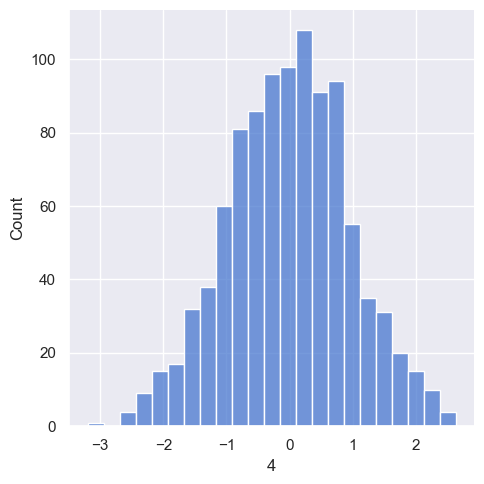

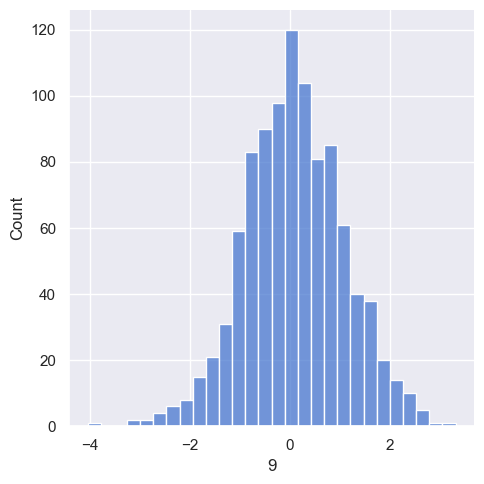

In [33]:
# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a histogram of the column values
        sns.displot(polluted_dataset[column_name])
